In [34]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ayush\Downloads\netflix\CONTENT_INTERACTION\ViewingActivity.csv")

In [35]:
df.shape

(1954, 10)

In [36]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alok,2022-06-11 15:33:45,01:11:31,NaN,The Dark Tower,NaN,Xiaomi M12 Set Top Box,01:28:08,01:28:08,IN (India)


In [37]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2022-06-11 15:33:45,01:11:31,The Dark Tower


In [38]:
df.dtypes


Start Time    object
Duration      object
Title         object
dtype: object

In [39]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [40]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('Asia/Kolkata')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2022-06-11 21:03:45+05:30,01:11:31,The Dark Tower


In [41]:
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                            object
Title                               object
dtype: object

In [42]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [52]:
brook = df[df['Title'].str.contains('Brooklyn Nine-Nine', regex=False)]

In [53]:
brook.shape

(260, 3)

In [55]:
brook = brook[(brook['Duration'] > '0 days 00:01:00')]
brook.shape

(224, 3)

In [56]:
office['Duration'].sum()

Timedelta('0 days 05:55:35')

In [57]:
brook['weekday'] = brook['Start Time'].dt.weekday
brook['hour'] = brook['Start Time'].dt.hour

# check to make sure the columns were added correctly
brook.head(1)

,Start Time,Duration,Title,weekday,hour
1243,2022-04-30 14:54:14+05:30,0 days 00:18:23,Brooklyn Nine-Nine: Season 7: Lights Out (Epis...,5,14


In [58]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'B99 Episodes Watched by Day'}>

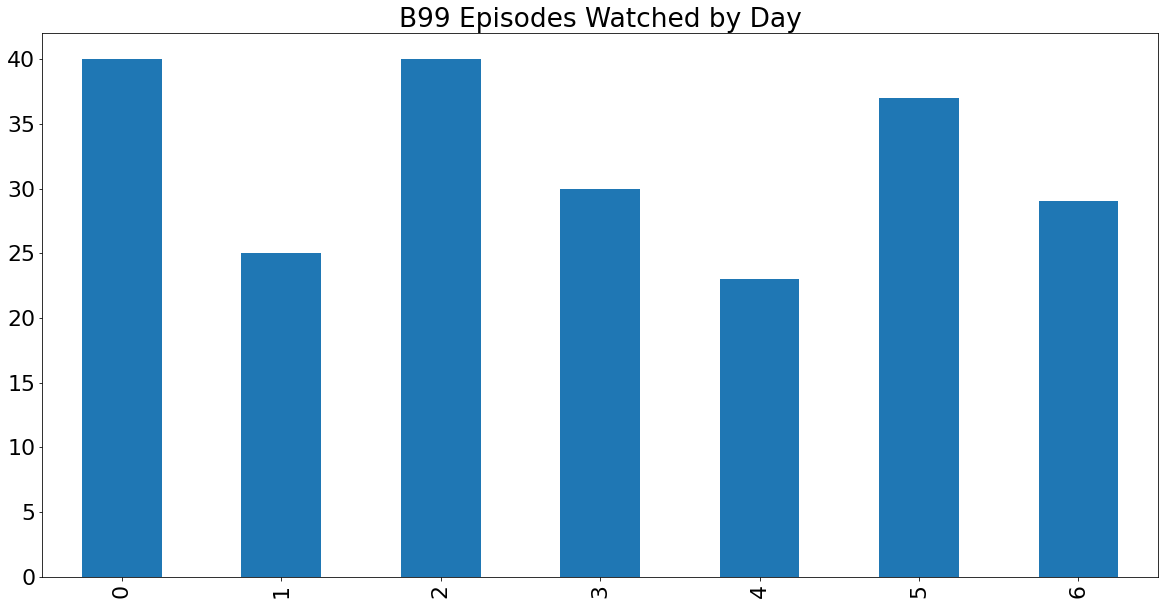

In [59]:
# set our categorical and define the order so the days are plotted Monday-Sunday
brook['weekday'] = pd.Categorical(brook['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
brook_by_day = brook['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
brook_by_day = brook_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
brook_by_day.plot(kind='bar', figsize=(20,10), title='B99 Episodes Watched by Day')

<AxesSubplot:title={'center':'B99 Episodes Watched by Hour'}>

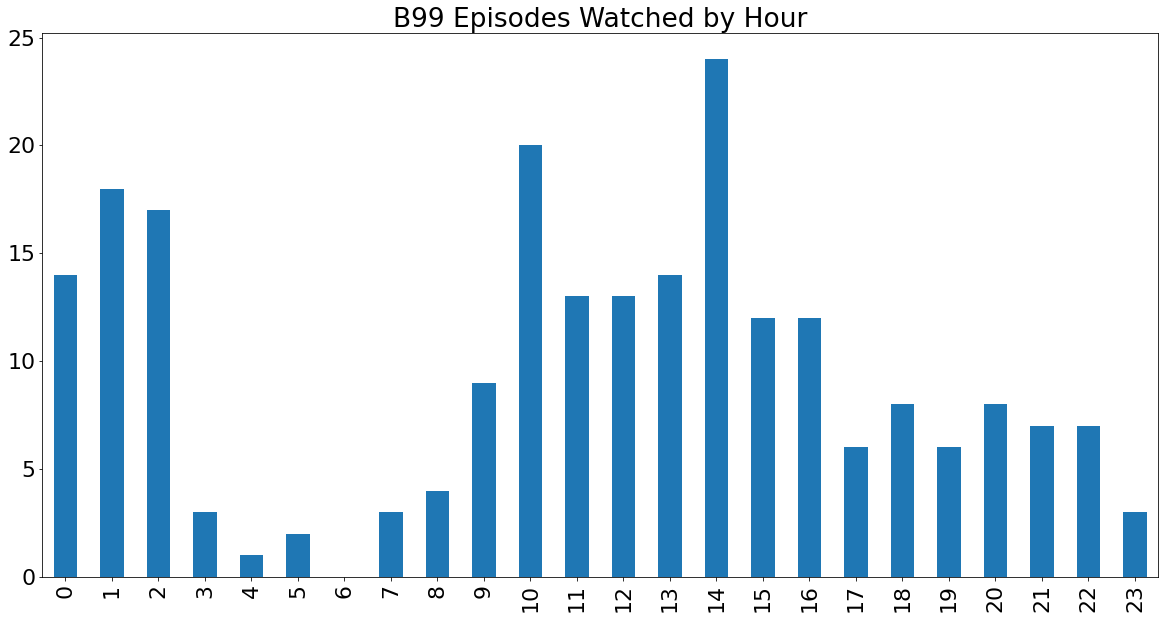

In [60]:
# set our categorical and define the order so the hours are plotted 0-23
brook['hour'] = pd.Categorical(brook['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
brook_by_hour = brook['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
brook_by_hour = brook_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
brook_by_hour.plot(kind='bar', figsize=(20,10), title='B99 Episodes Watched by Hour')